# Experiments with kernel machines

## 1. Basic training procedure

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [21]:
def learn_and_display_SVM(datafile, kernel_type='rbf', C_value=1.0, s_value=1.0):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Now train a support vector machine and identify the support vectors
    if kernel_type == 'rbf':
        clf = SVC(kernel='rbf', C=C_value, gamma=1.0/(s_value*s_value))
    if kernel_type == 'quadratic':
        clf = SVC(kernel='poly', degree=2, C=C_value, coef0=1.0)
    clf.fit(x,y)
    sv = np.zeros(n,dtype=bool)
    sv[clf.support_] = True
    notsv = np.logical_not(sv)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = clf.decision_function(grid)
    # Quantize the values to -1, -0.5, 0, 0.5, 1 for display purposes
    for i in range(len(Z)):
        Z[i] = min(Z[i],1.0)
        Z[i] = max(Z[i],-1.0)
        if (Z[i] > 0.0) and (Z[i] < 1.0):
            Z[i] = 0.5
        if (Z[i] < 0.0) and (Z[i] > -1.0):
            Z[i] = -0.5
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()

## 2. Experiments with the quadratic kernel

(48400,)
4.93451710253
(48400, 2)


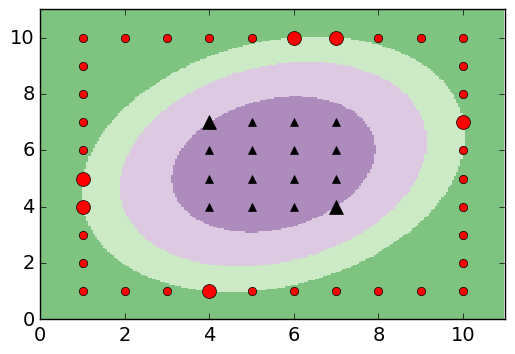

(48400,)
1.58866705265
(48400, 2)


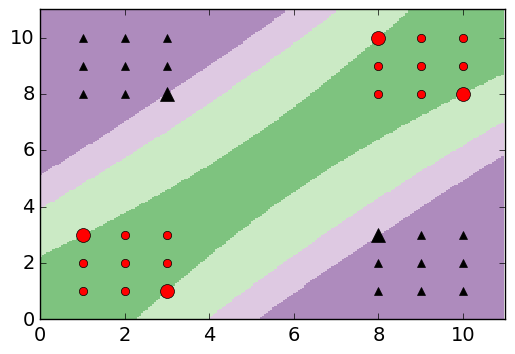

(48400,)
7.82703402744
(48400, 2)


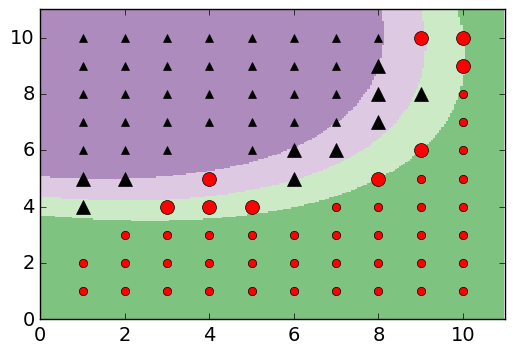

(48400,)
2.87832178854
(48400, 2)


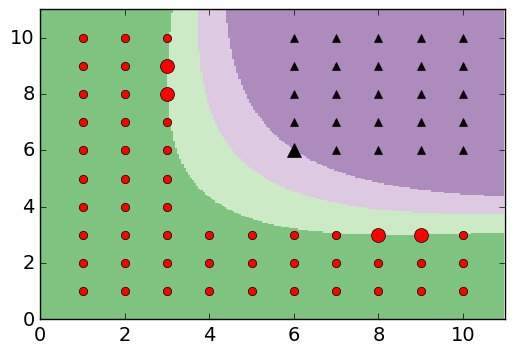

(48400,)
3.99842455815
(48400, 2)


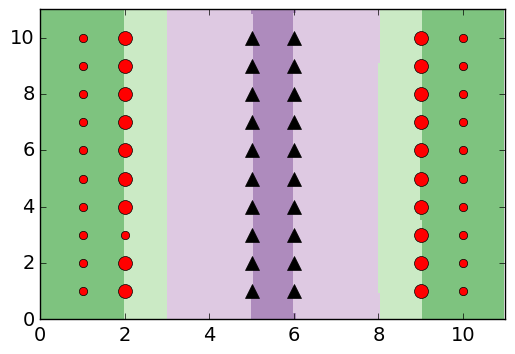

In [20]:
for i in range(5):
    fileName = 'C:/Users/tp179902741/Documents/Machine_learning/DSE220x_PA7/data%d.txt'%(i+1)
    learn_and_display_SVM(fileName, 'quadratic', 1.0)

## 3. Experiments with the RBF kernel

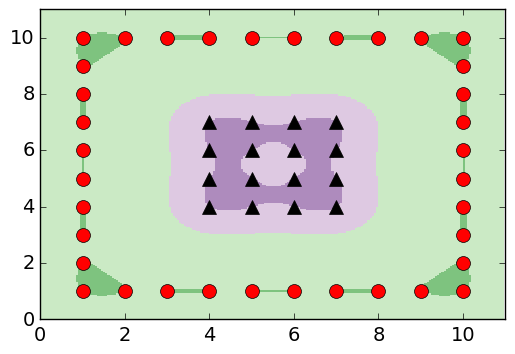

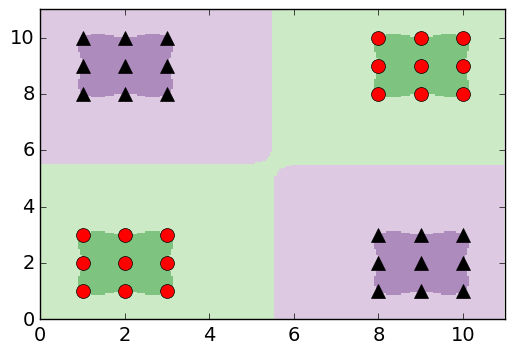

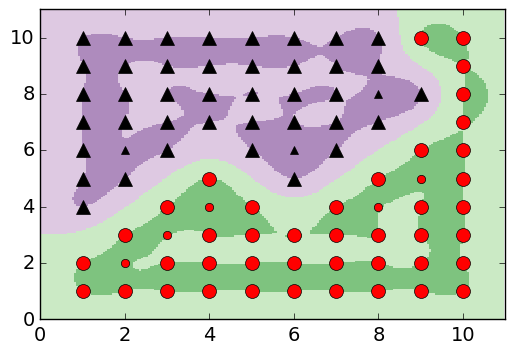

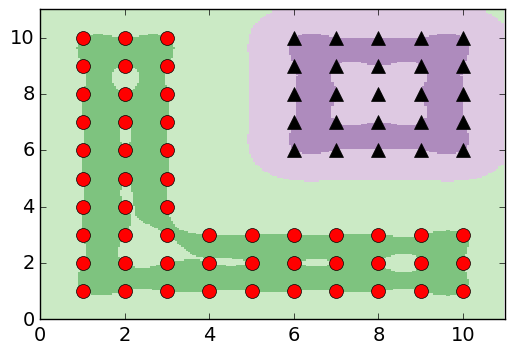

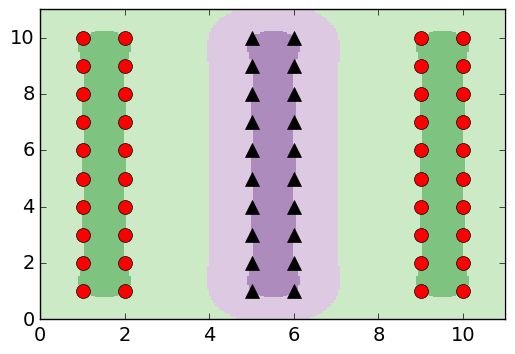

In [23]:
for i in range(5):
    fileName = 'C:/Users/tp179902741/Documents/Machine_learning/DSE220x_PA7/data%d.txt'%(i+1)
    learn_and_display_SVM(fileName, 'rbf', 10.0, 1)

## using an SVM for handwritten digit classification

In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal
from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [5]:
from sklearn.svm import SVC, LinearSVC
def run_multiclass_svm(C_value=1.0):
    print(0)
    # Train an SVM
    clf = LinearSVC(loss='hinge', C=C_value)
    clf.fit(train_data,train_labels)
    print(1)
    # Result
    train_err = float(np.sum(clf.predict(train_data) != train_labels))/len(train_labels)
    print(2)
    test_err = float(np.sum(clf.predict(test_data) != test_labels))/len(test_labels)
    print(3)
    return train_err, test_err

In [ ]:
cvals = [0.01,0.1,1.0,10.0,100.0]
for c in cvals:
    train_error, test_error = run_multiclass_svm(c)
    print ("Error rate for C = %0.2f: train %0.3f test %0.3f" % (c, train_error, test_error))

In [6]:
train_error, test_error = run_multiclass_svm()

0
1
2
3


In [8]:
train_error, test_error

(0.10546666666666667, 0.1133)

In [10]:
def run_multiclass_quadratic_svm(C_value=1.0):
    print(0)
    clf = SVC(kernel='poly', degree=2, C=C_value, coef0=1.0)
    clf.fit(train_data,train_labels)
    print(1)
    train_err = float(np.sum(clf.predict(train_data) != train_labels))/len(train_labels)
    print(2)
    test_err = float(np.sum(clf.predict(test_data) != test_labels))/len(test_labels)
    print(3)
    return train_err, test_err

In [11]:
train_error2, test_error2 = run_multiclass_quadratic_svm(C_value=1.0)

0
1
2
3


In [12]:
train_error2, test_error2

(0.0, 0.0194)